Feature Preprocessing and Generation
====

## 1. Numeric features

### 1.1 Feature Preprocessing

#### 1.1.1 Scaling

In [1]:
# Load data
from sklearn.datasets import load_breast_cancer
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# preprocess data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

minmax = MinMaxScaler()
minmax.fit(data)
data_minmax = minmax.transform(data)

standard = StandardScaler()
standard.fit(data)
data_standard = standard.transform(data)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
nn = MLPClassifier()
dtree = DecisionTreeClassifier()

# compare classifiers
classifiers = [log_reg, knn, nn, dtree]
name = ['Logistic Regression', 'KNeast Neighbors', 'Neural Network', 'Decision Tree']

def compare_classifiers(classifiers, name, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.25)
    
    blist = []
    for classifier, name in zip(classifiers, name):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = round(accuracy_score(y_test, y_pred), 3)
#         print(name, ':', score)
        blist.append(score)
        
    return blist
        
raw_data = compare_classifiers(classifiers, name, data, target)
minmax_data = compare_classifiers(classifiers, name, data_minmax, target)
standard_data = compare_classifiers(classifiers, name, data_standard, target)

# make dataframe of the results
results = pd.DataFrame([raw_data, minmax_data, standard_data], columns = name)
results.index = ['Raw', 'MinMax', 'Standard']
results = results.T

# visualize the results
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

ax = results.plot(kind='bar', figsize=(10, 6))
ax.set_ylim(0.8, 1.0)
ax.set_title("The Scores of Classifiers by different Scaling Methods\n", fontsize=15)
ax.set_xticklabels(name, rotation=30, fontsize=14)

plt.show()

<Figure size 1000x600 with 1 Axes>

#### 1.1.2 Log transformation and Square transformation

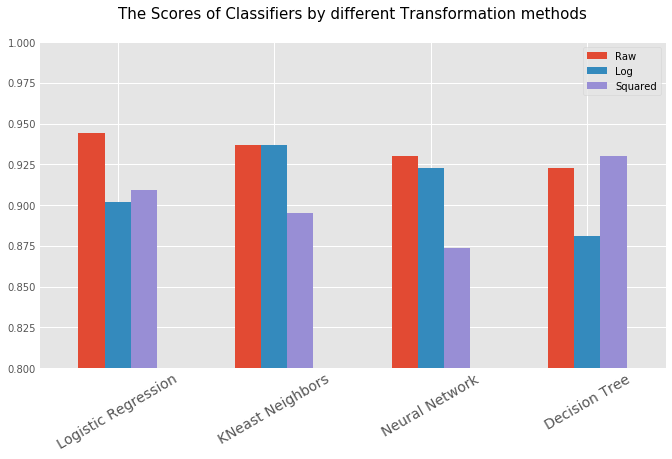

In [3]:
import numpy as np

data_log = np.log(data + 1)
data_square = np.square(data)

raw_data = compare_classifiers(classifiers, name, data, target)
log_data = compare_classifiers(classifiers, name, data_log, target)
square_data = compare_classifiers(classifiers, name, data_square, target)

# make dataframe of the results
results = pd.DataFrame([raw_data, log_data, square_data], columns = name)
results.index = ['Raw', 'Log', 'Squared']
results = results.T

# visualize the results
import matplotlib.pyplot as plt

plt.style.use('ggplot')

ax = results.plot(kind='bar', figsize=(10, 6))
ax.set_ylim(0.8, 1.0)
ax.set_title("The Scores of Classifiers by different Transformation methods\n", fontsize=15)
ax.set_xticklabels(name, rotation=30, fontsize=14)

plt.show()

### 1.2 Feature Generation

#### 1.2.1 Price example

In [4]:
products = ['chocolate bar', 'candy', 'USB', 'bluetooth speaker']
prices = [4.99, 1.23, 10.33, 99.76]

data = pd.DataFrame(prices, index=products, columns=['price'])
data

,price
chocolate bar,4.99
candy,1.23
USB,10.33
bluetooth speaker,99.76


In [5]:
data['price fraction int'] = data['price'].apply(lambda x : int(x))
data['price fraction float'] = data['price'] - data['price fraction int']
data

,price,price fraction int,price fraction float
chocolate bar,4.99,4,0.99
candy,1.23,1,0.23
USB,10.33,10,0.33
bluetooth speaker,99.76,99,0.76


#### 1.2.2 Distance example

In [6]:
horizontal = [2, 12, 33, 21]
vertical = [5, 10, 24, 17]

data2 = pd.DataFrame({'horizontal' : horizontal,
                      'vertical' : vertical})
data2

,horizontal,vertical
0,2,5
1,12,10
2,33,24
3,21,17


In [7]:
data2['hypotenuse'] = np.sqrt(np.square(data2['horizontal']) + np.square(data2['vertical']))
data2

,horizontal,vertical,hypotenuse
0,2,5,5.385165
1,12,10,15.620499
2,33,24,40.804412
3,21,17,27.018512


## 2. Categorical features

### 2.1 Feature Preprocessing

In [8]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train2 = train.drop(columns = ['PassengerId', 'Name', 'Ticket'])
train2.dropna(inplace = True)
y = train2['Survived']
train3 = train2.drop(columns = ['Survived'])
train3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,female,38.0,1,0,71.2833,C85,C
3,1,female,35.0,1,0,53.1000,C123,S
6,1,male,54.0,0,0,51.8625,E46,S
10,3,female,4.0,1,1,16.7000,G6,S
11,1,female,58.0,0,0,26.5500,C103,S


In [10]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder

train_le = train3.copy()

le = LabelEncoder()

train_le['Sex'] = le.fit_transform(train_le['Sex'].values)
train_le['Cabin'] = le.fit_transform(train_le['Cabin'].values)
train_le['Embarked'] = le.fit_transform(train_le['Embarked'].values)
train_le.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,0,38.0,1,0,71.2833,72,0
3,1,0,35.0,1,0,53.1000,48,2
6,1,1,54.0,0,0,51.8625,117,2
10,3,0,4.0,1,1,16.7000,131,2
11,1,0,58.0,0,0,26.5500,43,2


In [11]:
# One-Hot Encoding

train_oh = train3.copy()

train_oh = pd.get_dummies(train_oh, columns = ['Sex', 'Cabin', 'Embarked'])
train_oh.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A16,Cabin_A20,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,54.0,0,0,51.8625,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,3,4.0,1,1,16.7000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,1,58.0,0,0,26.5500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# Frequency Encoding
train_freq = train3.copy()

columns = ['Sex', 'Cabin', 'Embarked']

for col in columns:
    encoding = train_freq.groupby(col).size()
    encoding = encoding / len(train_freq)
    train_freq[col + '_freq'] = train_freq[col].map(encoding)
    train_freq.drop(columns = [col], inplace = True)
    
train_freq.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_freq,Cabin_freq,Embarked_freq
1,1,38.0,1,0,71.2833,0.480874,0.005464,0.355191
3,1,35.0,1,0,53.1000,0.480874,0.010929,0.633880
6,1,54.0,0,0,51.8625,0.519126,0.005464,0.633880
10,3,4.0,1,1,16.7000,0.480874,0.021858,0.633880
11,1,58.0,0,0,26.5500,0.480874,0.005464,0.633880


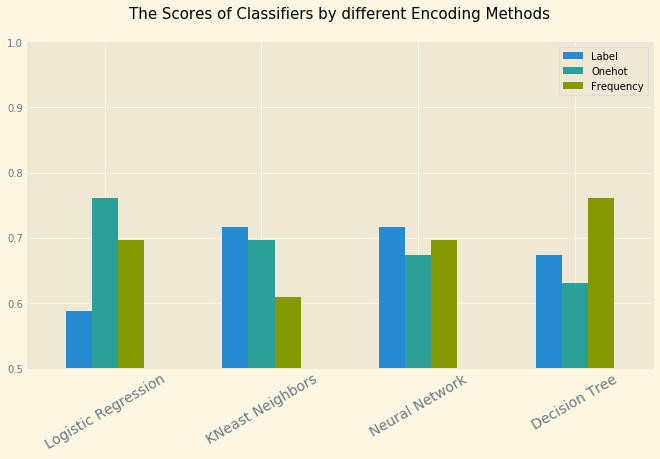

In [13]:
label_data = compare_classifiers(classifiers, name, train_le, y)
onehot_data = compare_classifiers(classifiers, name, train_oh, y)
frequency_data = compare_classifiers(classifiers, name, train_freq, y)

# make dataframe of the results
results = pd.DataFrame([label_data, onehot_data, frequency_data], columns = name)
results.index = ['Label', 'Onehot', 'Frequency']
results = results.T

# visualize
plt.style.use('Solarize_Light2')

ax = results.plot(kind='bar', figsize=(10, 6))
ax.set_ylim(0.5, 1.0)
ax.set_title("The Scores of Classifiers by different Encoding Methods\n", fontsize=15)
ax.set_xticklabels(name, rotation=30, fontsize=14)

plt.show()

### 2.2 Feature Genreation

#### 2.2.1 Combine two features

In [14]:
train_new = train3.copy()
train_new['Pclass'] = train_new['Pclass'].apply(str)

for sex in train_new['Sex'].unique():
    for pclass in train_new['Pclass']:
        train_new['sex_pclass'] = train_new['Sex'] + train_new['Pclass']

train_new = pd.get_dummies(train_new, columns = ['Sex', 'Cabin', 'Embarked', 'sex_pclass'])
        
train_new.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A16,Cabin_A20,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,sex_pclass_female1,sex_pclass_female2,sex_pclass_female3,sex_pclass_male1,sex_pclass_male2,sex_pclass_male3
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6,1,54.0,0,0,51.8625,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10,3,4.0,1,1,16.7000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11,1,58.0,0,0,26.5500,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


## 3. Datetime and Coordinates